![header%20ipynb.png](attachment:header%20ipynb.png)

# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 14
---
Pertemuan 14 (empatbelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun Model (RNN dan LSTM). silakan Anda kerjakan Latihan 1 s/d 5. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# RNN

Jaringan saraf berulang atau recurrent neural network (RNN) adalah jenis arsitektur jaringan saraf tiruan yang pemrosesannya dipanggil berulang-ulang untuk memroses masukan yang biasanya adalah data sekuensial. RNN masuk dalam kategori deep learning karena data diproses melalui banyak lapis (layer). RNN telah mengalami kemajuan yang pesat dan telah merevolusi bidang-bidang seperti pemrosesan bahasa alami (NLP), pengenalan suara, sintesa musik, pemrosesan data finansial seri waktu, analisa deret DNA, analisa video, dan sebagainya.


RNN memroses input secara sekuensial, sampel per sampel. Dalam tiap pemrosesan, output yang dihasilkan tidak hanya merupakan fungsi dari sampel itu saja, tapi juga berdasarkan state internal yang merupakan hasil dari pemrosesan sampel-sampel sebelumnya (atau setelahnya, pada bidirectional RNN).

Berikut adalah ilustrasi bagaimana RNN bekerja. Misalnya kita membuat RNN untuk menerjemahkan bahasa Indonesia ke bahasa Inggris

![image.png](attachment:image.png)

Ilustrasi di atas kelihatan rumit, tapi sebenarnya cukup mudah dipahami.

* sumbu horizontal adalah waktu, direpresentasikan dengan simbol t. Dapat kita bayangkan pemrosesan berjalan dari kiri ke kanan. Selanjutnya kita sebut t adalah langkah waktu (time step).

* Keseluruhan input adalah kalimat, dalam hal ini:
        Budi pergi ke sekolah.

* Pemrosean input oleh RNN adalah kata demi kata. Input kata-kata ini disimbolkan dengan x1 ,x2 , … ,x5 , atau secara umum xt.

* Output adalah kalimat, dalam hal ini:
        Budi goes to school.
 
* RNN memberikan output kata demi kata, dan ini kita simbolkan dengan ŷ1, ŷ2,  …, ŷ5 , atau secara umum ŷt .
* Dalam tiap pemrosesan, RNN akan menyimpan state internal yaitu st, yang  diberikan dari satu langkah waktu ke langkah waktu berikutnya. Inilah “memori” dari RNN.

Dengan contoh di atas, kita bisa generalisasikan arsitektur RNN sebagai berikut:

![image-2.png](attachment:image-2.png)

Tambahan yang tidak terdapat di diagram sebelumnya adalah U, V, dan W, yang merupakan parameter-parameter yang dimiliki RNN. Kita akan bahas pemakaian parameter-parameter ini nanti.

Penting untuk dipahami bahwa walaupun ada empat kotak RNN di gambar di atas, empat kotak itu mencerminkan satu modul RNN yang sama (satu instans model dengan parameter-parameter U, V, dan W yang sama). Penggambaran di atas hanya agar aspek sekuensialnya lebih tergambar.

Alternatif representasinya adalah seperti ini, agar lebih jelas bahwa hanya ada satu modul RNN:
![image-3.png](attachment:image-3.png)

Inilah sebabnya kenapa arsitektur ini disebut RNN. Kata recurrent (berulang) dalam RNN timbul karena RNN melakukan perhitungan yang sama secara berulang-ulang atas input yang kita berikan.

Sering juga kedua ilustrasi di atas digabungkan jadi satu sbb:
![image-4.png](attachment:image-4.png)
Sesuai dengan gambar di atas, ilustrasi di sebelah kanan adalah penjabaran (unrolled) dari versi berulang di sebelah kiri.

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [1]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
!pip install matplotlib
import matplotlib.pyplot as plt

# import library for build model 
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

# import library untuk data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Load Dataset

In [2]:
#Panggil file (load file bernama Stock.csv) dan simpan dalam dataframe
dataset ="Stock.csv"
data = pd.read_csv(dataset)

In [3]:
# tampilkan 5 baris data 
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,56.45,56.66,55.46,56.53,3716500,UTX
1,2006-01-04,56.80,56.80,55.84,56.19,3114500,UTX
2,2006-01-05,56.30,56.49,55.63,55.98,3118900,UTX
3,2006-01-06,56.45,56.67,56.10,56.16,2874300,UTX
4,2006-01-09,56.37,56.90,56.16,56.80,2467200,UTX


### Review Data

In [4]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3020 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [5]:
# Kolom 'low' yang akan kita gunakan dalam membangun model
# Slice kolom 'low' 

Low_data = data.iloc[:,3:4].values

In [ ]:
# cek output low_data
Low_data           

array([[ 55.46],
       [ 55.84],
       [ 55.63],
       ...,
       [126.92],
       [127.29],
       [127.57]])

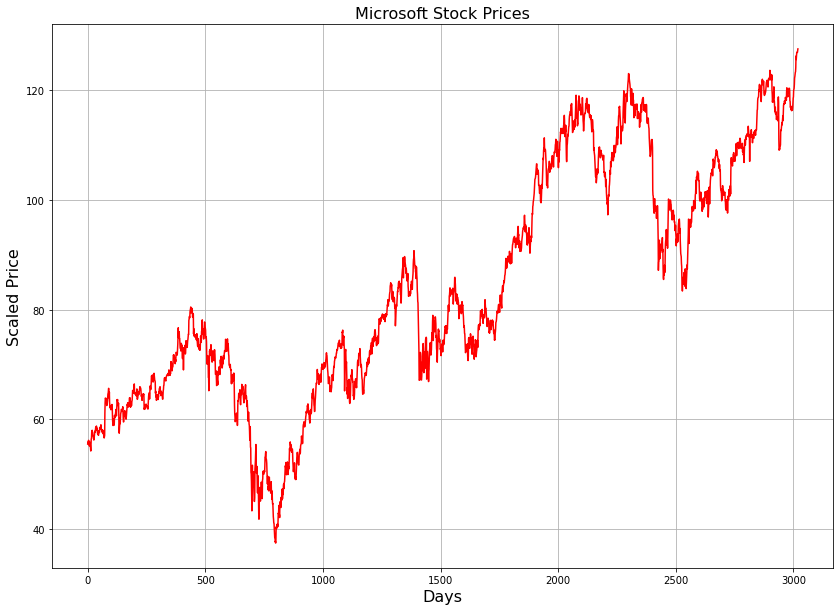

In [6]:
# Visualizing low_data

plt.figure(figsize=(14,10))                 
plt.plot(Low_data,c="red")
plt.title("Microsoft Stock Prices",fontsize=16)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Scaled Price",fontsize=16)
plt.grid()
plt.show()

# Latihan (2)

###  Data Preprocessing

In [7]:
# Menskalakan data antara 1 dan 0 (scaling) pada low data
scaler = MinMaxScaler(feature_range=(0,1))
low_scaled = scaler.fit_transform(Low_data)
low_scaled

array([[0.20028834],
       [0.20450261],
       [0.20217367],
       ...,
       [0.99279139],
       [0.99689475],
       [1.        ]])

In [8]:
# definisikan variabel step dan train 

stepsize = 21

X_train, y_train = [], []

# membuat fitur dan lists label
for i in range(stepsize,3019):                
    X_train.append(low_scaled[i-stepsize:i,0])
    y_train.append(low_scaled[i,0])

In [9]:
# mengonversi list yang telah dibuat sebelumnya ke array
X_train = np.array(X_train)                  
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)

(2998, 21) (2998,)


In [10]:
# 498 hari terakhir akan digunakan dalam pengujian
# 2500 hari pertama akan digunakan dalam pelatihan

X_test = X_train[2500:]             
X_train = X_train[:2500]         
y_test = y_train[2500:]  
y_train = y_train[:2500]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2500, 21) (498, 21)
(2500,) (498,)


In [11]:
# cek kembali dimensi data yang telah di reshape dengan function .shape
                          
X_train = np.reshape(X_train, (2500, stepsize, 1))           
X_test = np.reshape(X_test, (498, stepsize, 1))

print(X_train.shape, X_test.shape)

(2500, 21, 1) (498, 21, 1)


Sekarang kita bisa mulai membuat model kita, dimulai dengan RNN

# Latihan (3)

###  Build Model - RNN

In [12]:
# buat varibel penampung model RNN
rnn_model = Sequential()

In [13]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.15

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
rnn_model.add(Dense(1))

In [14]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam",loss="MSE")

In [15]:
# fit the model RNN, dengan epoch 20 dan batch size 25

rnn_model.fit(X_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
100/100 [==============================] - 4s 16ms/step - loss: 0.1042
Epoch 2/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0274
Epoch 3/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0183
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0129
Epoch 5/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0099
Epoch 6/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0086
Epoch 7/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0075
Epoch 8/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0066
Epoch 9/20
100/100 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 10/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0052
Epoch 11/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0047
Epoch 12/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0045
Epoch 13/20
1

In [16]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)

In [17]:
rnn_score

0.9743107010864748

# Latihan (4)

###  Build Model - LSTM

In [18]:
# buat varibel penampung model LSTM
lstm_model = Sequential()

In [19]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
lstm_model.add(Dense(1))

In [20]:
# menambahkan loss function kedalam model lstm dengan tipe MSE
lstm_model.compile(optimizer="adam",loss="MSE")

In [21]:
# fit lstm model, dengan epoch 20 dan batch size 25
lstm_model.fit(X_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
100/100 [==============================] - 8s 28ms/step - loss: 0.0199
Epoch 2/20
100/100 [==============================] - 3s 28ms/step - loss: 0.0035
Epoch 3/20
100/100 [==============================] - 3s 27ms/step - loss: 0.0031
Epoch 4/20
100/100 [==============================] - 3s 28ms/step - loss: 0.0027
Epoch 5/20
100/100 [==============================] - 3s 28ms/step - loss: 0.0029
Epoch 6/20
100/100 [==============================] - 3s 28ms/step - loss: 0.0027
Epoch 7/20
100/100 [==============================] - 3s 26ms/step - loss: 0.0026
Epoch 8/20
100/100 [==============================] - 3s 28ms/step - loss: 0.0024
Epoch 9/20
100/100 [==============================] - 3s 27ms/step - loss: 0.0026
Epoch 10/20
100/100 [==============================] - 3s 28ms/step - loss: 0.0023
Epoch 11/20
100/100 [==============================] - 3s 26ms/step - loss: 0.0021
Epoch 12/20
100/100 [==============================] - 3s 28ms/step - loss: 0.0021
Epoch 13/20
1

In [22]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test,lstm_predictions)

In [23]:
lstm_score

0.9438185592433311

# Latihan (5)

### Evaluation

In [24]:
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square
print("R^2 Score of RNN",rnn_score)
print("R^2 Score of LSTM",lstm_score)

R^2 Score of RNN 0.9743107010864748
R^2 Score of LSTM 0.9438185592433311


### Visualisasi Perbandingan Hasil Model prediksi dengan data original 

In [25]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(y_test.reshape(-1,1))

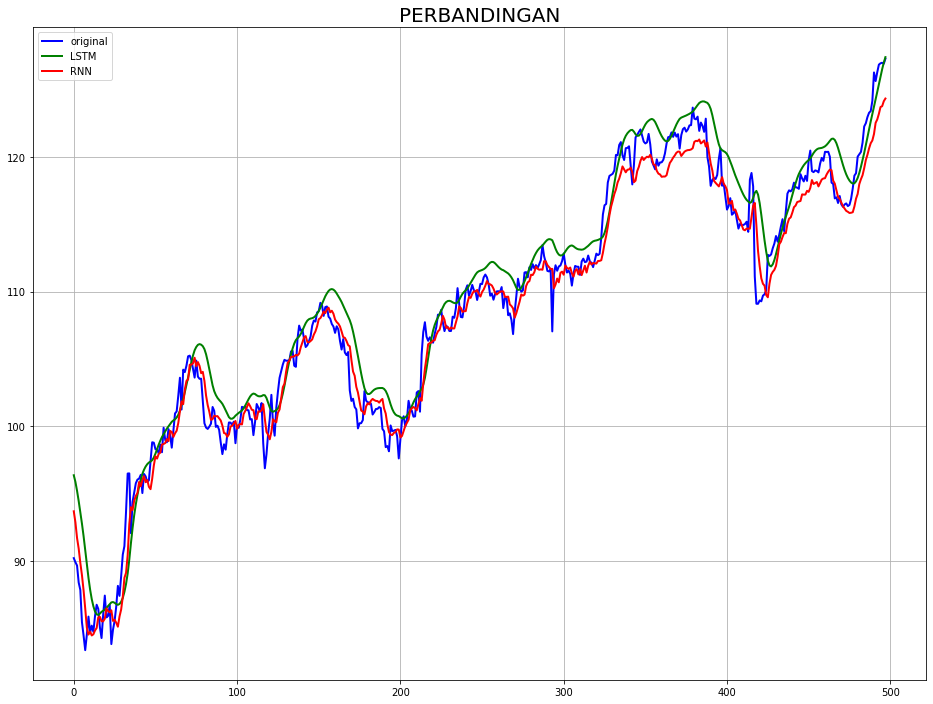

In [26]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()

## Berikan Kesimpulan Anda!

Dapat disimpulkan bahwa model RNN lebih baik untuk prediksi data time series berupa saham dibandingkan model LSTM.